In [11]:
import pandas as pd
import numpy as np
dataset=pd.read_excel("C:/Users/97254/Downloads/patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')
print(dataset.shape)

(1020, 70)


In [12]:
dataset.head()

,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [13]:
#remove NAN
dataset = dataset[~dataset['age'].isin(['NAN'])]

In [14]:
dataset = dataset[[
    'ICU_mortality',
 'LOS_Group',
'trauma',
'metabolic',
'gastrointestinal',
'Sepsis'
,'age'
,'gender'
,'weight'
,'BMI'
,'active problems'
,'background problems'
,'feeding'
,'Target_pro_day'
,'pro_to_target_day0'
,'pro_to_target_day1'
,'pro_to_target_day2'
,'pro_to_target_day3'
,'pro_to_target_day4'
,'pro_to_target_day5'
,'pro_to_target_day6'
,'pro_to_target_day7'
,'pro_to_target_day8'
,'pro_to_target_day9'
,'pro_to_target_day10'
,'pro_to_target_day11'
,'pro_to_target_day12'
,'pro_to_target_day13'
,'Total_EN_pro'
,'Total_PN_pro'
,'EN_pro_day0'
,'PN_pro_day0'
,'EN_pro_day1'
,'PN_pro_day1'
,'EN_pro_day2'
,'PN_pro_day2'
,'EN_pro_day3'
,'PN_pro_day3'
,'EN_pro_day4'
,'PN_pro_day4'
,'EN_pro_day5'
,'PN_pro_day5'
,'EN_pro_day6'
,'PN_pro_day6'
,'EN_pro_day7'
,'PN_pro_day7'
,'EN_pro_day8'
,'PN_pro_day8'
,'EN_pro_day9'
,'PN_pro_day9'
,'EN_pro_day10'
,'PN_pro_day10'
,'EN_pro_day11'
,'PN_pro_day11'
,'EN_pro_day12'
,'PN_pro_day12'
,'EN_pro_day13'
,'PN_pro_day13'  
,'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg'        
    
]]
dataset.shape

(976, 64)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 0 to 1019
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ICU_mortality        976 non-null    int64  
 1   LOS_Group            976 non-null    object 
 2   trauma               976 non-null    int64  
 3   metabolic            976 non-null    int64  
 4   gastrointestinal     976 non-null    int64  
 5   Sepsis               976 non-null    int64  
 6   age                  976 non-null    object 
 7   gender               976 non-null    object 
 8   weight               976 non-null    float64
 9   BMI                  976 non-null    float64
 10  active problems      976 non-null    object 
 11  background problems  976 non-null    object 
 12  feeding              976 non-null    object 
 13  Target_pro_day       976 non-null    float64
 14  pro_to_target_day0   976 non-null    float64
 15  pro_to_target_day1   976 non-null    fl

In [16]:
dataset.shape

(976, 64)

In [17]:
dataset.ICU_mortality.value_counts()

0    741
1    235
Name: ICU_mortality, dtype: int64

In [18]:
from pycaret.classification import *
model_setup = setup(data=dataset, target='ICU_mortality', data_split_stratify = True)

,Description,Value
0,session_id,5750
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(976, 64)"
5,Missing Values,False
6,Numeric Features,54
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [19]:
best = compare_models()
print(best)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7541,0.0000,0.1467,0.4767,0.2177,0.1190,0.1497,0.0070
lr,Logistic Regression,0.7512,0.6414,0.1706,0.4424,0.2432,0.1315,0.1524,0.4710
et,Extra Trees Classifier,0.7511,0.6219,0.0853,0.3917,0.1382,0.0633,0.0870,0.0800
rf,Random Forest Classifier,0.7497,0.5949,0.0489,0.3317,0.0826,0.0278,0.0469,0.0880
lda,Linear Discriminant Analysis,0.7438,0.6677,0.2143,0.4521,0.2850,0.1523,0.1711,0.0100
lightgbm,Light Gradient Boosting Machine,0.7409,0.5641,0.1518,0.4019,0.2155,0.0988,0.1169,0.0410
gbc,Gradient Boosting Classifier,0.7307,0.5915,0.1217,0.3431,0.1742,0.0561,0.0688,0.1230
ada,Ada Boost Classifier,0.7306,0.5752,0.1768,0.4026,0.2364,0.1009,0.1182,0.0470
svm,SVM - Linear Kernel,0.7146,0.0000,0.1577,0.2671,0.1795,0.0568,0.0545,0.0210
knn,K Neighbors Classifier,0.7116,0.5621,0.1033,0.2480,0.1427,0.0079,0.0081,0.0140


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=5750,
                solver='auto', tol=0.001)


In [21]:
#run svm
model = create_model("nb")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3333,0.6584,0.9412,0.2623,0.4103,0.0405,0.1020
1,0.3188,0.6544,0.9412,0.2581,0.4051,0.0299,0.0807
2,0.3478,0.6210,1.0000,0.2742,0.4304,0.0712,0.1921
3,0.4265,0.5817,0.8750,0.2745,0.4179,0.0930,0.1601
4,0.3088,0.6058,0.9375,0.2459,0.3896,0.0268,0.0738
5,0.3382,0.6659,0.8750,0.2456,0.3836,0.0255,0.0554
6,0.2647,0.5697,0.8750,0.2258,0.3590,-0.0241,-0.0719
7,0.2941,0.6683,1.0000,0.2500,0.4000,0.0377,0.1387
8,0.4853,0.7488,0.8750,0.2979,0.4444,0.1439,0.2207
9,0.2794,0.5802,1.0000,0.2576,0.4096,0.0200,0.1005


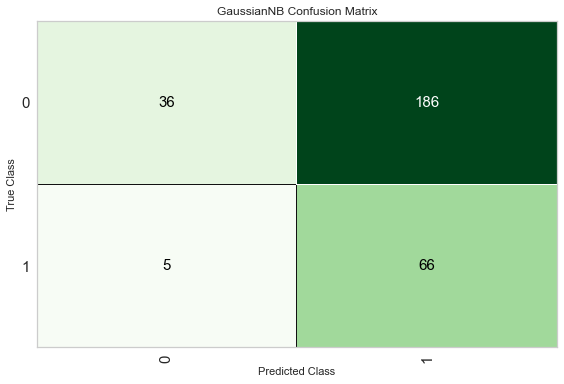

In [22]:
plot_model(tuned_rf, plot = 'confusion_matrix')


# run all featers with pca_components=40

In [13]:
from pycaret.classification import *
model_setup = setup(data=dataset, target='ICU_mortality', data_split_stratify = True,pca = True, pca_components =40)

,Description,Value
0,session_id,2300
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(976, 64)"
5,Missing Values,False
6,Numeric Features,53
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7541,0.5533,0.0371,0.2667,0.0633,0.0246,0.0363,0.0840
rf,Random Forest Classifier,0.7526,0.5614,0.0371,0.2167,0.0627,0.0213,0.0212,0.1120
ridge,Ridge Classifier,0.7512,0.0000,0.0680,0.3100,0.1107,0.0478,0.0624,0.0060
qda,Quadratic Discriminant Analysis,0.7497,0.5926,0.1169,0.4007,0.1754,0.0873,0.1130,0.0080
lr,Logistic Regression,0.7409,0.5818,0.0801,0.2779,0.1219,0.0389,0.0467,0.4780
lda,Linear Discriminant Analysis,0.7409,0.5909,0.0798,0.2895,0.1228,0.0386,0.0446,0.0070
knn,K Neighbors Classifier,0.7292,0.5025,0.1103,0.3152,0.1616,0.0452,0.0538,0.0130
nb,Naive Bayes,0.7292,0.5814,0.1721,0.3606,0.2299,0.0932,0.1024,0.0070
lightgbm,Light Gradient Boosting Machine,0.7218,0.5898,0.0919,0.2982,0.1344,0.0174,0.0269,0.0680
gbc,Gradient Boosting Classifier,0.7160,0.5388,0.0739,0.1490,0.0945,-0.0150,-0.0319,0.1820


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=293, verbose=0,
                     warm_start=False)


In [14]:
#run svm
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5507,0.0000,0.5882,0.2941,0.3922,0.0948,0.1092
1,0.6232,0.0000,0.4706,0.3200,0.3810,0.1240,0.1288
2,0.5652,0.0000,0.6471,0.3143,0.4231,0.1368,0.1599
3,0.5588,0.0000,0.3750,0.2308,0.2857,-0.0079,-0.0084
4,0.6324,0.0000,0.6875,0.3548,0.4681,0.2287,0.2580
5,0.6029,0.0000,0.7500,0.3429,0.4706,0.2181,0.2611
6,0.6176,0.0000,0.5625,0.3214,0.4091,0.1565,0.1699
7,0.5441,0.0000,0.5625,0.2727,0.3673,0.0738,0.0857
8,0.6471,0.0000,0.4375,0.3182,0.3684,0.1319,0.1351
9,0.6471,0.0000,0.7059,0.3871,0.5000,0.2615,0.2898


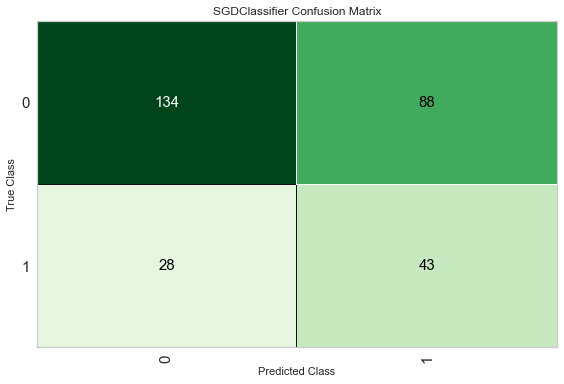

In [15]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [26]:
#increase pca_components =50
from pycaret.classification import *
model_setup = setup(data=dataset, target='ICU_mortality', data_split_stratify = True,pca = True, pca_components =50)

,Description,Value
0,session_id,178
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(976, 64)"
5,Missing Values,False
6,Numeric Features,54
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [27]:
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5072,0.0000,0.5882,0.2703,0.3704,0.0494,0.0596
1,0.7391,0.0000,0.3529,0.4615,0.4000,0.2371,0.2406
2,0.5362,0.0000,0.4706,0.2581,0.3333,0.0221,0.0245
3,0.6029,0.0000,0.5000,0.2963,0.3721,0.1087,0.1167
4,0.4706,0.0000,0.6875,0.2619,0.3793,0.0585,0.0797
5,0.4118,0.0000,0.8125,0.2600,0.3939,0.0582,0.0971
6,0.7206,0.0000,0.3125,0.3846,0.3448,0.1697,0.1711
7,0.6324,0.0000,0.6875,0.3548,0.4681,0.2287,0.2580
8,0.2794,0.0000,0.6875,0.2000,0.3099,-0.0860,-0.1711
9,0.5294,0.0000,0.4706,0.2581,0.3333,0.0154,0.0170


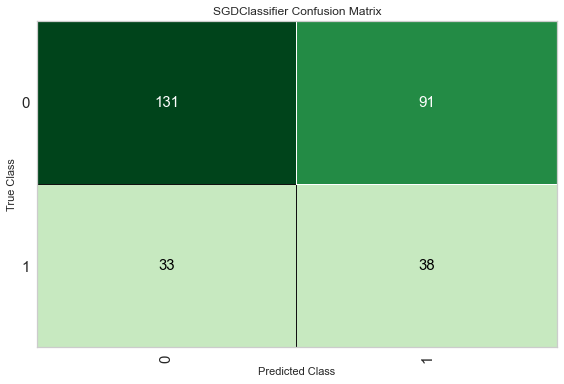

In [28]:
plot_model(tuned_rf, plot = 'confusion_matrix')

# feater importance

In [5]:
#labeling
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['active problems'] = le.fit_transform(dataset['active problems'].astype(str))
dataset['background problems'] = le.fit_transform(dataset['background problems'].astype(str))
dataset['gender'] = le.fit_transform(dataset['gender'].astype(str))
dataset['feeding'] = le.fit_transform(dataset['feeding'].astype(str))
dataset['LOS_Group'] = le.fit_transform(dataset['LOS_Group'].astype(str))
dataset['age'] = dataset['age'].astype(int)

In [33]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
 
model.fit(dataset.iloc[:,1:],dataset.iloc[:,0])
 
feature_importances=pd.DataFrame({'features':dataset.iloc[:,1:].columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False).head(40)


,features,feature_importance
5,age,0.042841
14,pro_to_target_day1,0.036032
8,BMI,0.035907
15,pro_to_target_day2,0.035744
31,EN_pro_day1,0.034900
13,pro_to_target_day0,0.034498
16,pro_to_target_day3,0.032284
58,EN_pro_day1/kg,0.031640
60,EN_pro_day3/kg,0.031539
17,pro_to_target_day4,0.031141


In [34]:
X=dataset[feature_importances['features'].tolist()]

In [35]:
X.head()

,LOS_Group,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,active problems,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,1,0,1,0,1,72,0,65.0,23.875115,1,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,0,0,1,0,1,58,1,101.0,32.979592,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,1,0,0,1,1,44,1,70.0,22.857143,3,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,0,0,1,1,0,71,0,48.0,19.227688,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,1,1,1,1,0,60,0,85.0,32.791945,0,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [36]:
X=pd.concat([dataset['ICU_mortality'],X],axis=1)

In [37]:
from pycaret.classification import *
model_setup = setup(data=X, target='ICU_mortality', data_split_stratify = True)

,Description,Value
0,session_id,3737
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(976, 64)"
5,Missing Values,False
6,Numeric Features,58
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [38]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7643,0.6082,0.1294,0.5633,0.2008,0.1250,0.1717,0.0840
et,Extra Trees Classifier,0.7599,0.6149,0.1537,0.5083,0.2315,0.1375,0.1730,0.0810
gbc,Gradient Boosting Classifier,0.7585,0.6186,0.1412,0.4929,0.2170,0.1249,0.1594,0.1150
nb,Naive Bayes,0.7571,0.6573,0.2327,0.5185,0.3139,0.1907,0.2174,0.0070
ridge,Ridge Classifier,0.7570,0.0000,0.1415,0.4517,0.2089,0.1206,0.1515,0.0060
qda,Quadratic Discriminant Analysis,0.7525,0.5861,0.1279,0.4094,0.1890,0.1001,0.1252,0.0140
lr,Logistic Regression,0.7438,0.6068,0.1415,0.3935,0.2043,0.0961,0.1126,0.0940
lightgbm,Light Gradient Boosting Machine,0.7394,0.6089,0.1787,0.3919,0.2409,0.1166,0.1284,0.0420
lda,Linear Discriminant Analysis,0.7379,0.6367,0.1654,0.4189,0.2274,0.1049,0.1251,0.0090
knn,K Neighbors Classifier,0.7218,0.5325,0.1592,0.3327,0.2128,0.0714,0.0785,0.0130


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3737, verbose=0,
                       warm_start=False)


In [39]:
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5652,0.0000,0.4118,0.2593,0.3182,0.0227,0.0240
1,0.5072,0.0000,0.5882,0.2703,0.3704,0.0494,0.0596
2,0.3188,0.0000,1.0000,0.2656,0.4198,0.0498,0.1598
3,0.3088,0.0000,0.9412,0.2581,0.4051,0.0208,0.0599
4,0.3971,0.0000,0.7500,0.2449,0.3692,0.0224,0.0364
5,0.8088,0.0000,0.1875,1.0000,0.3158,0.2609,0.3873
6,0.6618,0.0000,0.3125,0.2941,0.3030,0.0800,0.0801
7,0.7206,0.0000,0.2500,0.3636,0.2963,0.1294,0.1329
8,0.5735,0.0000,0.6250,0.3030,0.4082,0.1336,0.1551
9,0.7647,0.0000,0.3125,0.5000,0.3846,0.2486,0.2591


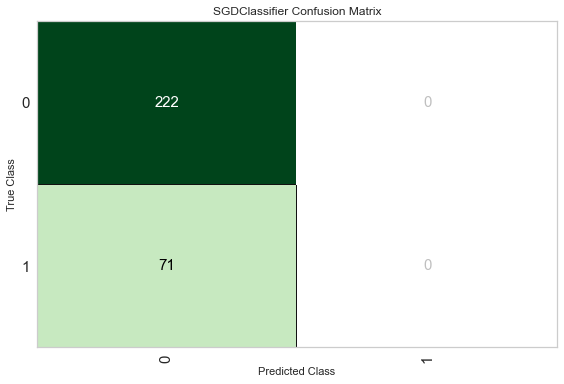

In [40]:
plot_model(tuned_rf, plot = 'confusion_matrix')

# look at corrolationbetween featers

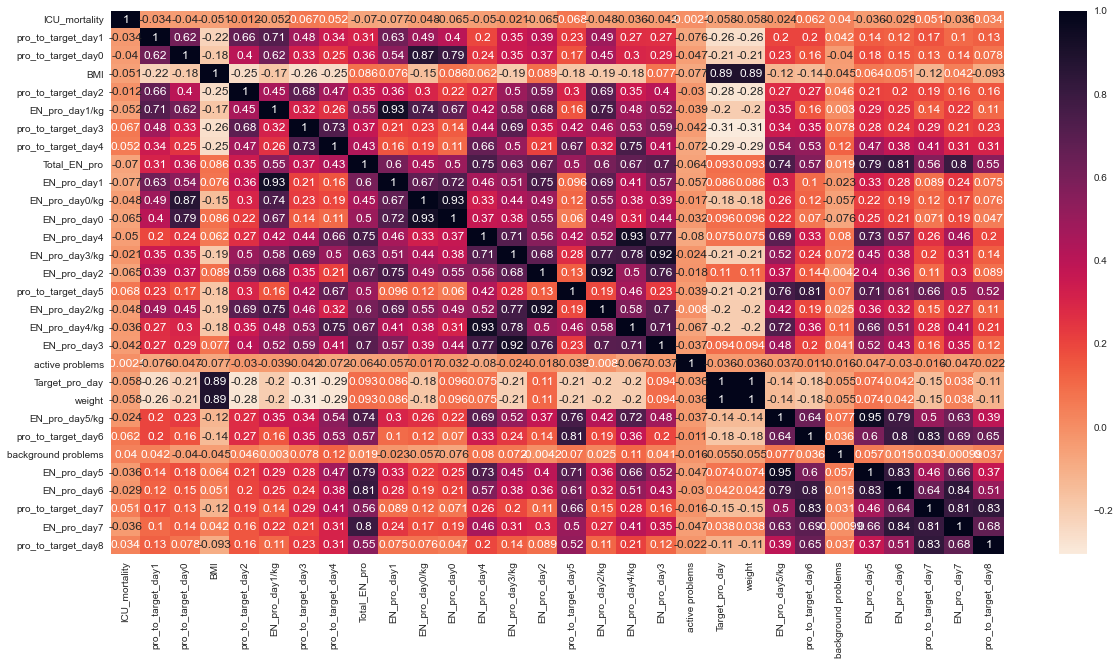

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), annot=True, cmap='rocket_r')

plt.show()

# SVC

In [48]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.750, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.750, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.750, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.750, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.750, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.750, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.750, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.750, total=   0.1s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.750, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.750, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.750, total=   0.1s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .

[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.724, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.724, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.737, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.750, total=   0.1s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.660, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.647, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.603, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.635, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.686, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  C=1000, gamma=0.0001, kernel=sigmoid, score=0.622, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  C=1000, gamma=0.0001, kernel=sigmoid, score=0.654, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   10.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

grid_predictions = grid.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       156
           1       0.00      0.00      0.00        40

    accuracy                           0.80       196
   macro avg       0.40      0.50      0.44       196
weighted avg       0.63      0.80      0.71       196



In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, grid_predictions)


array([[156,   0],
       [ 40,   0]], dtype=int64)

# NN

In [137]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=63, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [138]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [139]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=recall_m)
#model.fit(X.iloc[:,1:], X.ICU_mortality, epochs=150, batch_size=10)
model.fit(x_train, y_train, epochs=50, batch_size=10)



Epoch 1/50
78/78 [==============================] - 0s 923us/step - loss: 6.4702 - recall_m: 0.1432
Epoch 2/50
78/78 [==============================] - 0s 1ms/step - loss: 2.5892 - recall_m: 0.1891
Epoch 3/50
78/78 [==============================] - 0s 923us/step - loss: 1.9263 - recall_m: 0.1994
Epoch 4/50
78/78 [==============================] - 0s 944us/step - loss: 1.5370 - recall_m: 0.1786
Epoch 5/50
78/78 [==============================] - 0s 923us/step - loss: 1.3334 - recall_m: 0.1957
Epoch 6/50
78/78 [==============================] - 0s 923us/step - loss: 1.1403 - recall_m: 0.2249
Epoch 7/50
78/78 [==============================] - 0s 718us/step - loss: 1.0515 - recall_m: 0.2348
Epoch 8/50
78/78 [==============================] - 0s 820us/step - loss: 0.8860 - recall_m: 0.2058
Epoch 9/50
78/78 [==============================] - 0s 821us/step - loss: 0.8445 - recall_m: 0.1972
Epoch 10/50
78/78 [==============================] - 0s 820us/step - loss: 0.7700 - recall_m: 0.2688
E

In [141]:
_, recall = model.evaluate(x_test, y_test)
print('recall: %.2f' % (recall*100))

7/7 [==============================] - 0s 2ms/step - loss: 0.9904 - recall_m: 0.1667
recall: 16.67


# explore by LOS_Group

In [5]:
dataset['LOS_Group'].value_counts()

LOS_8-13    511
LOS_5-7     465
Name: LOS_Group, dtype: int64

In [78]:
LOS_8=dataset[dataset['LOS_Group']==1]#8-13

In [126]:
from pycaret.classification import *
model_setup = setup(data=LOS_8, target='ICU_mortality', data_split_stratify = True,pca = True, pca_components =40,normalize=True)

,Description,Value
0,session_id,3424
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(511, 64)"
5,Missing Values,False
6,Numeric Features,59
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [127]:
#for more info: https://pycaret.org/tune-model/
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5000,0.0000,0.4444,0.2353,0.3077,-0.0286,-0.0321
1,0.4722,0.0000,0.5556,0.2500,0.3448,0.0000,0.0000
2,0.6667,0.0000,0.7778,0.4118,0.5385,0.3143,0.3534
3,0.5556,0.0000,0.9000,0.3750,0.5294,0.2258,0.3070
4,0.3333,0.0000,0.5000,0.2083,0.2941,-0.1613,-0.2193
5,0.6667,0.0000,0.8000,0.4444,0.5714,0.3333,0.3721
6,0.5000,0.0000,0.5000,0.2778,0.3571,0.0000,0.0000
7,0.5429,0.0000,0.5556,0.2941,0.3846,0.0728,0.0822
8,0.4286,0.0000,0.6667,0.2609,0.3750,0.0085,0.0118
9,0.6571,0.0000,0.7778,0.4118,0.5385,0.3046,0.3438


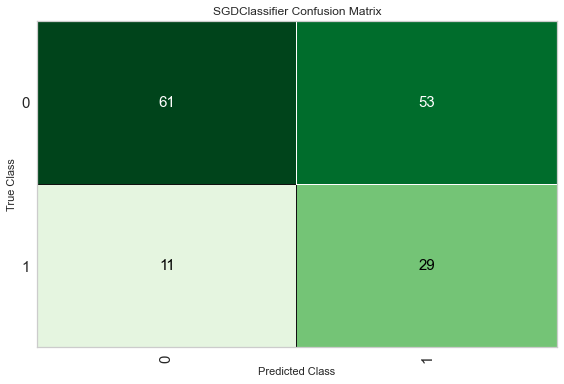

In [128]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [6]:
LOS_5=dataset[dataset['LOS_Group']==0]

In [7]:
LOS_5=LOS_5[[
        'ICU_mortality',
 'LOS_Group',
'trauma',
'metabolic',
'gastrointestinal',
'Sepsis'
,'age'
,'gender'
,'weight'
,'BMI'
,'active problems'
,'background problems'
,'feeding'
,'Target_pro_day'
,'pro_to_target_day0'
,'pro_to_target_day1'
,'pro_to_target_day2'
,'pro_to_target_day3'
,'pro_to_target_day4'
,'pro_to_target_day5'
,'pro_to_target_day6'
,'pro_to_target_day7'

,'Total_EN_pro'
,'Total_PN_pro'
,'EN_pro_day0'
,'PN_pro_day0'
,'EN_pro_day1'
,'PN_pro_day1'
,'EN_pro_day2'
,'PN_pro_day2'
,'EN_pro_day3'
,'PN_pro_day3'
,'EN_pro_day4'
,'PN_pro_day4'
,'EN_pro_day5'
,'PN_pro_day5'
,'EN_pro_day6'
,'PN_pro_day6'
,'EN_pro_day7'
,'PN_pro_day7'
 
,'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg' 
]]

In [8]:
LOS_5.shape

(465, 46)

In [9]:
from pycaret.classification import *
model_setup = setup(data=LOS_5, target='ICU_mortality', data_split_stratify = True,pca = True, pca_components =40,normalize=True)#for more info: https://pycaret.org/tune-model/
#for more info: https://pycaret.org/tune-model/
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4848,0.0000,0.5714,0.2222,0.3200,0.0209,0.0271
1,0.6364,0.0000,0.8571,0.3529,0.5000,0.2852,0.3551
2,0.4545,0.0000,0.5714,0.2105,0.3077,-0.0034,-0.0045
3,0.5455,0.0000,1.0000,0.3182,0.4828,0.2373,0.3669
4,0.5152,0.0000,0.6250,0.2778,0.3846,0.0737,0.0904
5,0.5312,0.0000,0.8571,0.3000,0.4444,0.1781,0.2537
6,0.6250,0.0000,0.7143,0.3333,0.4545,0.2227,0.2604
7,0.5000,0.0000,0.5714,0.2353,0.3333,0.0340,0.0426
8,0.4375,0.0000,0.4286,0.1765,0.2500,-0.0868,-0.1089
9,0.4062,0.0000,0.5714,0.2000,0.2963,-0.0411,-0.0586


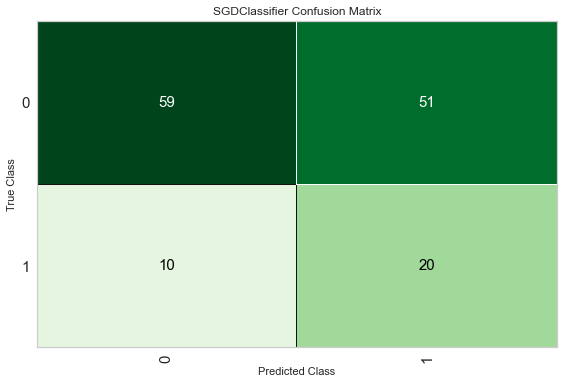

In [10]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [ ]:
from pycaret.classification import *
model_setup = setup(data=LOS_5, target='ICU_mortality', data_split_stratify = True,pca = True, pca_components =25,normalize=True)#for more info: https://pycaret.org/tune-model/
#for more info: https://pycaret.org/tune-model/
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 30)

In [52]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7507,0.6060,0.1600,0.6583,0.2495,0.1590,0.2202,0.1430
et,Extra Trees Classifier,0.7507,0.6457,0.1100,0.5667,0.1779,0.1218,0.1804,0.1160
lda,Linear Discriminant Analysis,0.7479,0.6821,0.2456,0.5317,0.3288,0.2058,0.2285,0.0100
lr,Logistic Regression,0.7451,0.6755,0.2256,0.5317,0.3114,0.1904,0.2164,0.0270
lightgbm,Light Gradient Boosting Machine,0.7449,0.6038,0.2233,0.5367,0.3081,0.1874,0.2155,0.0500
ridge,Ridge Classifier,0.7422,0.0000,0.2033,0.5133,0.2836,0.1682,0.1946,0.0090
svm,SVM - Linear Kernel,0.7369,0.0000,0.4822,0.4919,0.4822,0.3083,0.3105,0.0110
qda,Quadratic Discriminant Analysis,0.7337,0.6463,0.2467,0.4833,0.3227,0.1821,0.1979,0.0120
knn,K Neighbors Classifier,0.7227,0.5849,0.2433,0.4364,0.3083,0.1566,0.1666,0.0150
gbc,Gradient Boosting Classifier,0.7196,0.6114,0.2133,0.4500,0.2863,0.1376,0.1546,0.1780


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8478, verbose=0,
                       warm_start=False)


# explore decision tree

In [68]:
x = dataset.iloc[:,1:64]   # Second column until the last column
y = dataset.iloc[:,0]    # First column (Survived) is our target
from sklearn.model_selection import train_test_split
#this function randomly split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
#test_size=.3 means that our test set will be 30% of the train set.
x_train.head()

,LOS_Group,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,active problems,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
14,0,1,1,1,1,75,0,38.0,14.843750,7,...,0.0,0.0,0.0,0.0,0.760351,1.111579,1.251298,1.113895,0.575088,0.000000
157,1,0,1,1,1,44,0,75.0,27.548209,7,...,0.0,0.0,0.0,0.0,1.066667,1.010634,1.587232,1.587200,0.000000,0.000000
524,1,0,0,1,1,71,0,55.0,20.957171,6,...,0.0,0.0,0.0,0.0,1.130400,0.462933,0.110400,0.000000,0.000000,0.000000
40,0,0,1,1,0,80,1,65.0,21.469150,0,...,0.0,0.0,0.0,0.0,0.000000,0.400738,0.147095,0.343806,0.873908,0.974769
613,0,0,1,1,0,66,0,90.0,31.887755,0,...,0.0,0.0,0.0,0.0,0.281481,0.689630,0.810667,0.778578,0.810667,0.679496


In [69]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score


In [70]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,40):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i,class_weight='balanced')
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(recall_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i,class_weight='balanced')
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(recall_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters

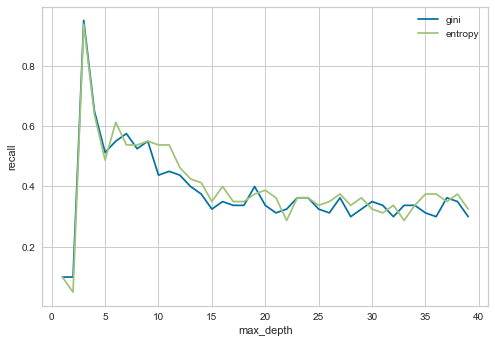

In [71]:
# visualizing changes in parameters
import matplotlib.pyplot as plt

plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.legend()

In [72]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3,class_weight='balanced')
dtree.fit(x_train, y_train)
from sklearn import tree
print(tree.export_text(dtree))

|--- feature_46 <= 2.55
|   |--- feature_9 <= 10.50
|   |   |--- feature_22 <= 0.70
|   |   |   |--- class: 1
|   |   |--- feature_22 >  0.70
|   |   |   |--- class: 0
|   |--- feature_9 >  10.50
|   |   |--- class: 0
|--- feature_46 >  2.55
|   |--- feature_48 <= 89.27
|   |   |--- feature_19 <= 0.20
|   |   |   |--- class: 0
|   |   |--- feature_19 >  0.20
|   |   |   |--- class: 1
|   |--- feature_48 >  89.27
|   |   |--- feature_38 <= 72.09
|   |   |   |--- class: 0
|   |   |--- feature_38 >  72.09
|   |   |   |--- class: 0



In [73]:
pred = dtree.predict(x_test)
recall_score(y_test, pred)

0.9375

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)


array([[ 30, 183],
       [  5,  75]], dtype=int64)

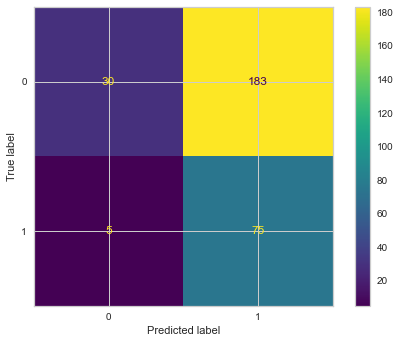

In [75]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree, x_test, y_test)  
plt.show()  

In [257]:
PN_h=dataset[dataset['PN_pro_day6']>54.25]

In [258]:
from pycaret.classification import *
model_setup = setup(data=PN_h, target='ICU_mortality', data_split_stratify = True,normalize=True)#for more info: https://pycaret.org/tune-model/
#for more info: https://pycaret.org/tune-model/
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6000,0.0000,1.0000,0.5000,0.6667,0.2857,0.4082
1,0.6000,0.0000,1.0000,0.6000,0.7500,0.0000,0.0000
2,0.6000,0.0000,1.0000,0.6000,0.7500,0.0000,0.0000
3,0.2500,0.0000,0.5000,0.3333,0.4000,-0.5000,-0.5774
4,0.5000,0.0000,1.0000,0.5000,0.6667,0.0000,0.0000
5,0.5000,0.0000,1.0000,0.5000,0.6667,0.0000,0.0000
6,0.5000,0.0000,1.0000,0.5000,0.6667,0.0000,0.0000
7,0.5000,0.0000,1.0000,0.5000,0.6667,0.0000,0.0000
8,0.5000,0.0000,1.0000,0.5000,0.6667,0.0000,0.0000
9,0.5000,0.0000,1.0000,0.5000,0.6667,0.0000,0.0000


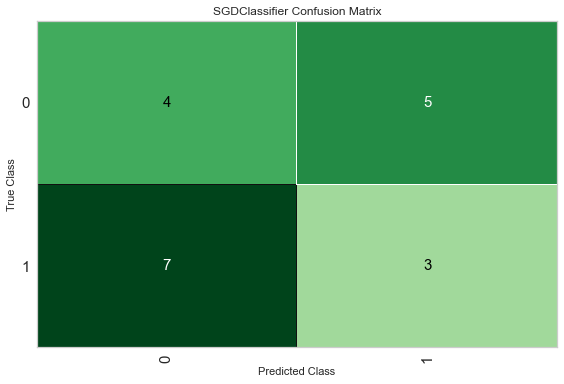

In [259]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [260]:
PN_h=dataset[dataset['PN_pro_day6']<=54.25]

In [261]:
from pycaret.classification import *
model_setup = setup(data=PN_l, target='ICU_mortality', data_split_stratify = True)#for more info: https://pycaret.org/tune-model/
#for more info: https://pycaret.org/tune-model/
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7385,0.0000,0.0000,0.0000,0.0000,-0.0823,-0.1153
1,0.7538,0.0000,0.0714,0.2500,0.1111,0.0170,0.0216
2,0.4615,0.0000,0.2857,0.1379,0.1860,-0.1473,-0.1691
3,0.7846,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.4923,0.0000,0.5000,0.2121,0.2979,-0.0066,-0.0081
5,0.7231,0.0000,0.0667,0.2000,0.1000,-0.0174,-0.0211
6,0.7231,0.0000,0.0000,0.0000,0.0000,-0.0833,-0.1205
7,0.3385,0.0000,0.8667,0.2407,0.3768,0.0244,0.0524
8,0.7692,0.0000,0.1333,0.5000,0.2105,0.1256,0.1636
9,0.2344,0.0000,1.0000,0.2222,0.3636,0.0088,0.0667


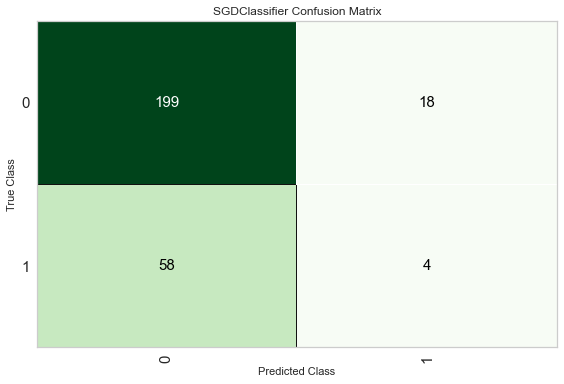

In [262]:
plot_model(tuned_rf, plot = 'confusion_matrix')